# Comparative Analysis of Supervised Learning Algorithms for Diamond Price Prediction

In this analysis, we're comparing different ways to predict diamond prices using machine learning. By analyzing algorithms such as Linear Regression, K Nearest Neighbors, Decision Tree Regression, and Random Forest Regression, we seek to identify the most effective approach for diamond price prediction. Through this comparative analysis, we aim to provide insights that can inform pricing decisions and enhance understanding within the diamond industry.

**Dataset Overview:**

The dataset comprises 10 features, with 'Price (in US dollars)' being the target variable for prediction. Our objective is to predict the price of a diamond using various regression algorithms.

**Column Descriptions:**
- Carat (Weight of Diamond): Represents the weight of the diamond.
- Cut (Quality): Indicates the quality of the diamond cut, ranging from Fair to Ideal.
- Color: Denotes the color grade of the diamond, with D being the best and J being the worst.
- Clarity: Measures the transparency of the diamond, with a sequence from I1 (worst quality) to IF (best quality).
- Table: Represents the width of the top of the diamond.
- Price (in US dollars): The price of the diamond in US dollars.
- X (Length), Y (Width), Z (Depth): Dimensions of the diamond in millimeters.
- Depth: The total depth percentage of the diamond, calculated using a formula involving length, width, and depth.

The goal of this analysis is to employ regression algorithms to accurately predict diamond prices based on these features.

### Importing Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pylab as pylab
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_error
from sklearn import metrics
from sklearn.pipeline import Pipeline
import time
import warnings
warnings.filterwarnings("ignore")

### Phase 1: Dataset Selection and Preprocessing

In [3]:
# Reading the CSV file
file_path = "diamond.csv"
df_diamonds = pd.read_csv(file_path)
df_diamonds

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
# Printing the first 10 rows of the dataset
df_diamonds.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [5]:
# Printing the last 10 rows of the dataset
df_diamonds.tail(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53930,53931,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53931,53932,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43
53932,53933,0.70,Very Good,E,VS2,60.5,59.0,2757,5.71,5.76,3.47
53933,53934,0.70,Very Good,E,VS2,61.2,59.0,2757,5.69,5.72,3.49
53934,53935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [6]:
df_diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [7]:
df_diamonds.shape

(53940, 11)

**Data Cleaning**

In [8]:
#The first column seems is just index so we are removing that column
df_diamonds = df_diamonds.drop(["Unnamed: 0"], axis=1)
df_diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [9]:
# checking null values in the dataset
df_diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

**There are no null values in the dataset**

- Min value of "x", "y", "z" are zero this indicates that there are faulty values in data that represents dimensionless or 2-dimensional diamonds. 
- So we need to filter out those as it clearly faulty data points.

In [10]:
# Checking for value 0 in the columns 'x', 'y' and 'z'
df_diamonds[np.logical_or(np.logical_or(df_diamonds['x'] == 0, df_diamonds['y'] == 0), df_diamonds['z'] == 0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [11]:
len(df_diamonds[np.logical_or(np.logical_or(df_diamonds['x'] == 0, df_diamonds['y'] == 0), df_diamonds['z'] == 0)])

20

In [12]:
# dropping rows with value 0 in the columns x, y, and z
rows=['x', 'y', 'z']
df_diamonds[rows] = df_diamonds[rows].replace(0, np.NaN)
df_diamonds.dropna(subset=rows, inplace=True)

In [13]:
# checking for duplicate data
df_diamonds[df_diamonds.duplicated()]

,carat,cut,color,clarity,depth,table,price,x,y,z
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
2025,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28
...,...,...,...,...,...,...,...,...,...,...
47296,0.30,Good,J,VS1,63.4,57.0,394,4.23,4.26,2.69
47969,0.52,Ideal,D,VS2,61.8,55.0,1919,5.19,5.16,3.20
49326,0.51,Ideal,F,VVS2,61.2,56.0,2093,5.17,5.19,3.17
50079,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17


In [14]:
# dropping for duplicate data
df_diamonds = df_diamonds.drop_duplicates()

In [15]:
# checking the shape of the dataset after removing duplicates
df_diamonds.shape

(53775, 10)

**Removing Outliers**

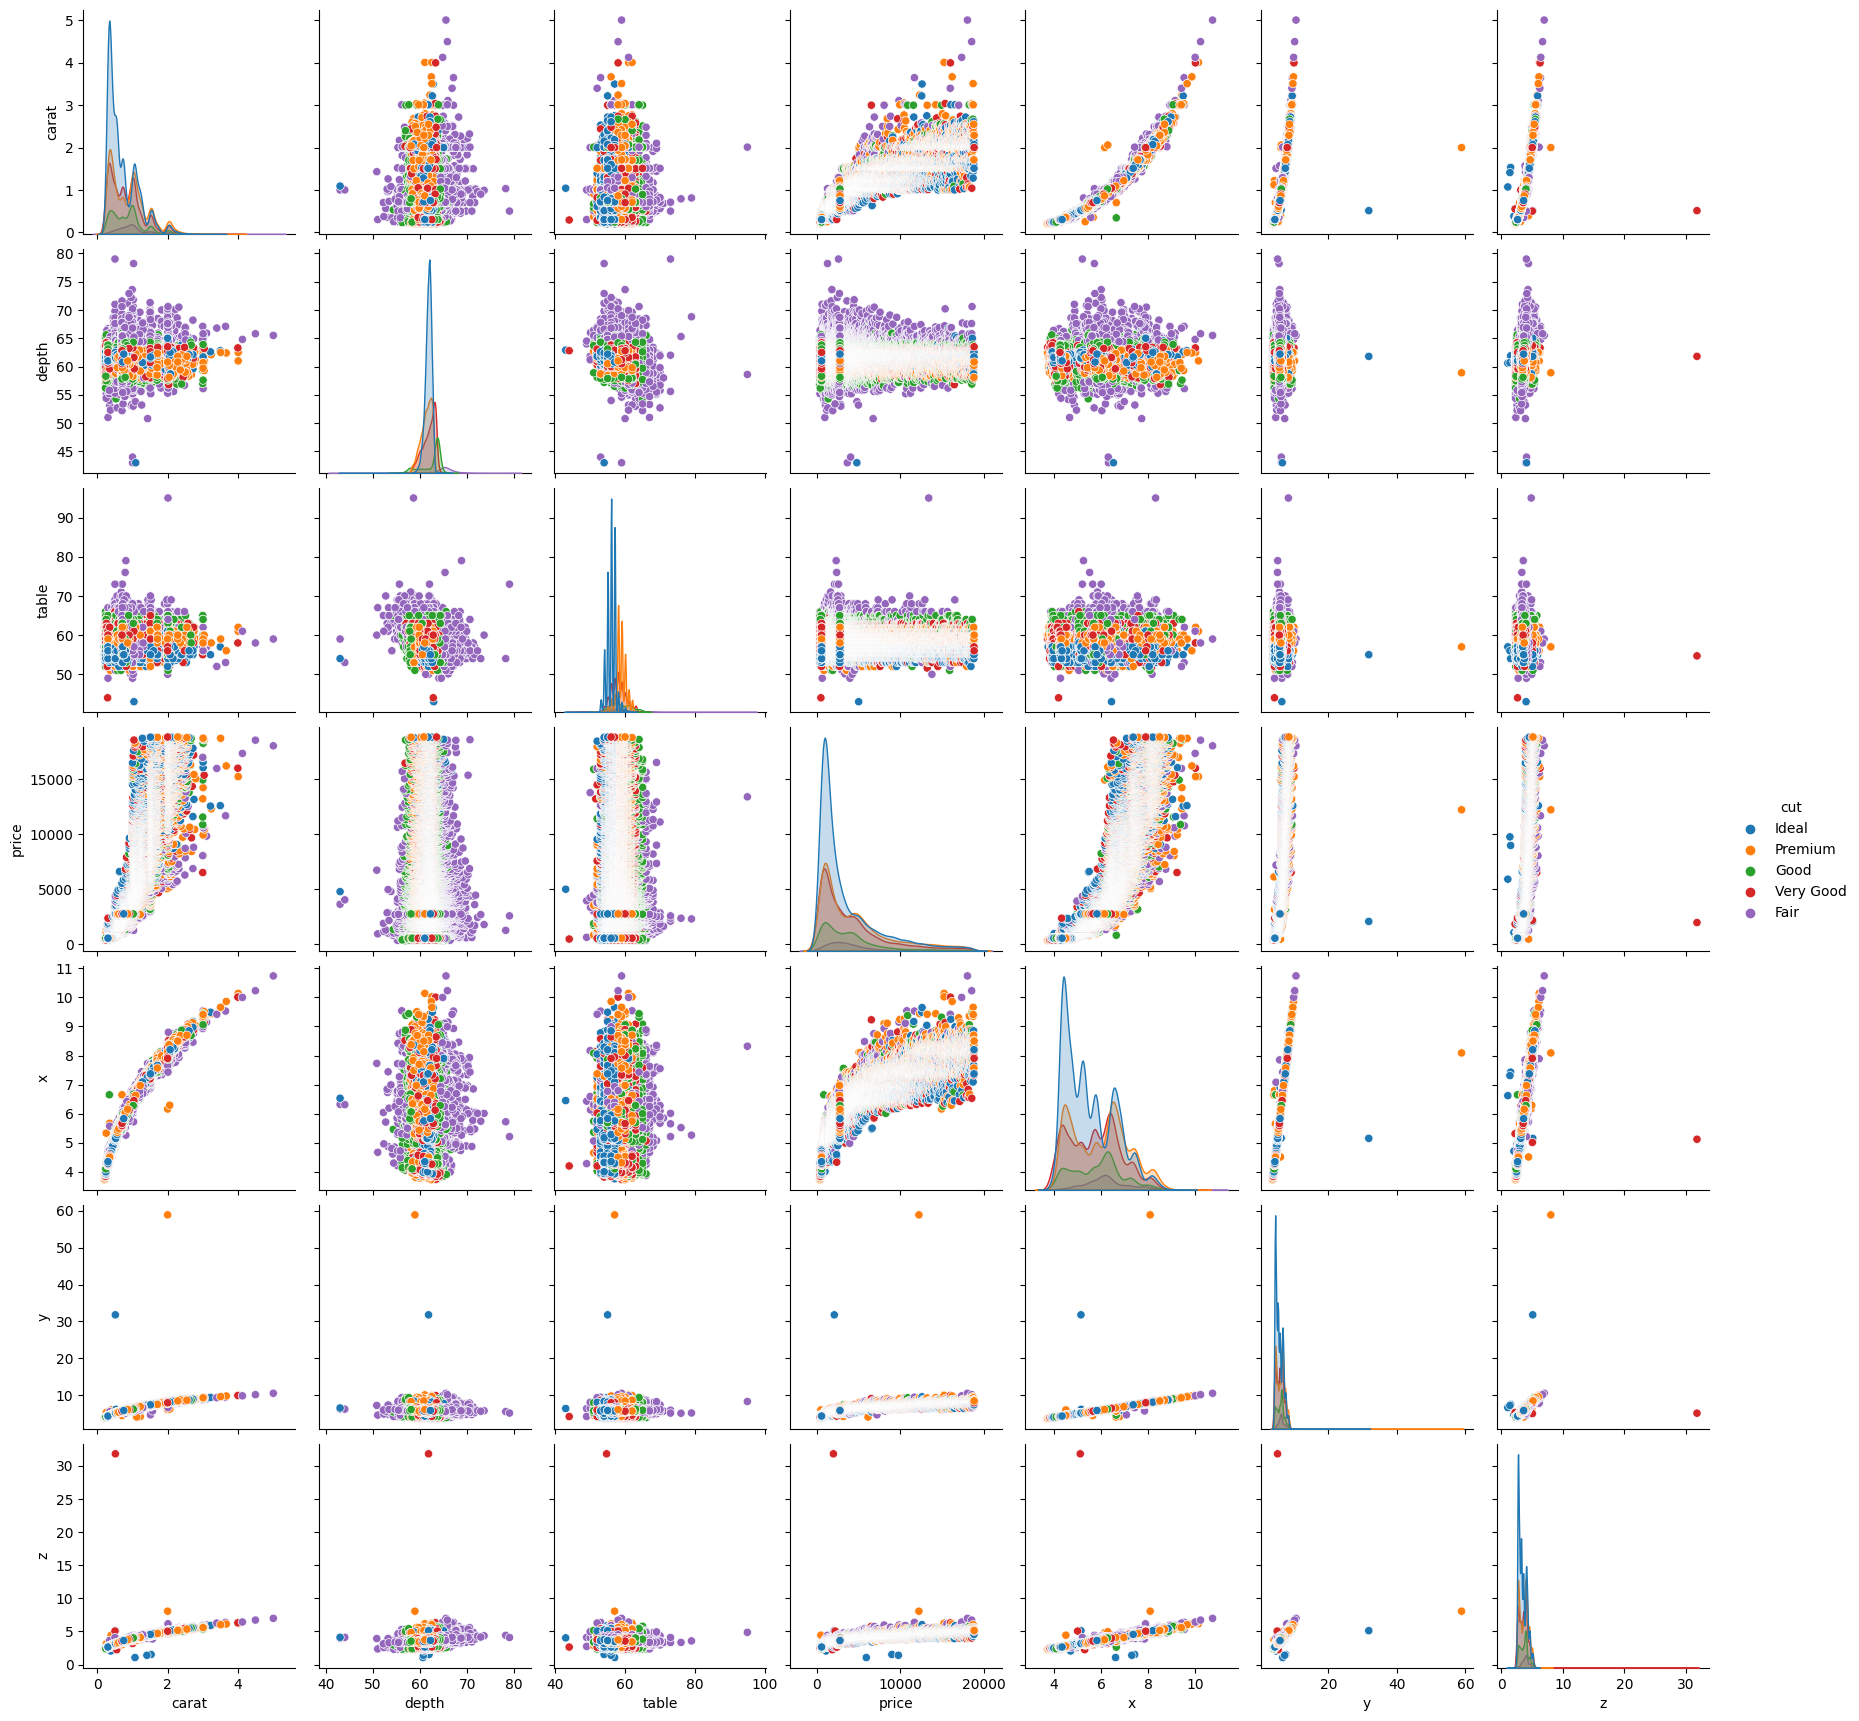

In [16]:
# plotting pairplot of the data
sns.pairplot(df_diamonds, hue = 'cut')

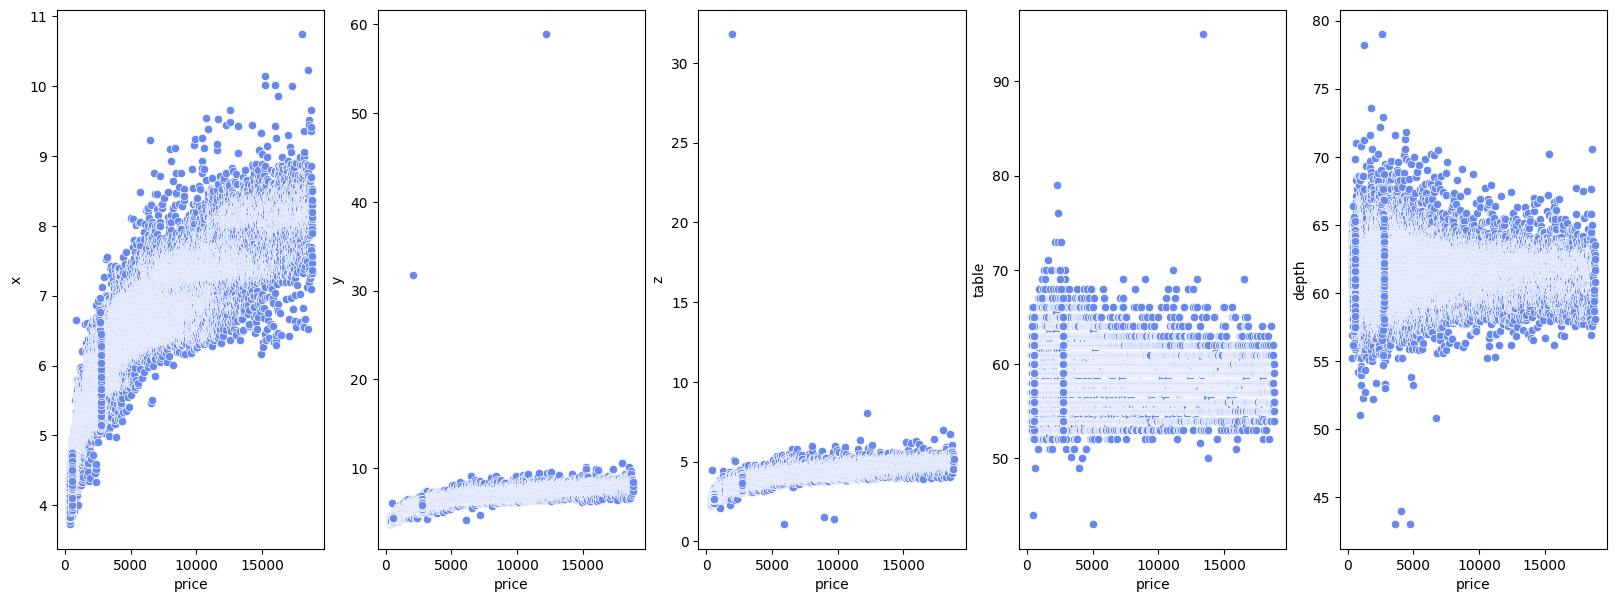

In [17]:
sns.set_palette("coolwarm")
cols = ['x','y','z','table','depth']
c = 0
fig, axs = plt.subplots(ncols = len(cols), figsize=(20,7))
for i in cols :
    sns.scatterplot(data = df_diamonds,x = df_diamonds['price'],y = df_diamonds[i], ax = axs[c])
    c+=1

**Capping the columns**
- x only values that are < 30 
- y only values that are < 30 
- z only values that are < 30 and > 2.5 
- table only values that are < 80 and > 45 
- depth only values that are < 75 and > 45

In [18]:
df_diamonds = df_diamonds[(df_diamonds['x'] < 30)]
df_diamonds = df_diamonds[(df_diamonds['y'] < 30)]
df_diamonds = df_diamonds[(df_diamonds['z'] < 30) & (df_diamonds['z'] > 2)]
df_diamonds = df_diamonds[(df_diamonds['table'] < 80) & (df_diamonds['table'] > 40)]
df_diamonds = df_diamonds[(df_diamonds['depth'] < 75) & (df_diamonds['depth'] > 45)]

df_diamonds.shape # checking the shape of the dataset after removing outliers

(53763, 10)

**Dataset Normalization**

In [19]:
numerical_columns = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

# Create MinMaxScaler object
scaler = MinMaxScaler()
df_diamonds[numerical_columns] = scaler.fit_transform(df_diamond[numerical_columns])
df_diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.006237,Ideal,E,SI2,0.469298,0.333333,0.000000,0.031384,0.043732,0.075203
1,0.002079,Premium,E,SI1,0.394737,0.500000,0.000000,0.022825,0.023324,0.050813
2,0.006237,Good,E,VS1,0.267544,0.611111,0.000054,0.045649,0.056851,0.050813
3,0.018711,Premium,I,VS2,0.508772,0.416667,0.000433,0.067047,0.080175,0.115854
4,0.022869,Good,J,SI2,0.548246,0.416667,0.000487,0.087019,0.097668,0.140244
...,...,...,...,...,...,...,...,...,...,...
53935,0.108108,Ideal,D,SI1,0.438596,0.388889,0.131427,0.288160,0.303207,0.292683
53936,0.108108,Good,D,SI1,0.539474,0.333333,0.131427,0.279601,0.301749,0.315041
53937,0.103950,Very Good,D,SI1,0.526316,0.472222,0.131427,0.275321,0.291545,0.304878
53938,0.137214,Premium,H,SI2,0.447368,0.416667,0.131427,0.345221,0.355685,0.341463


**Splitting into training and testing sets**

In [20]:
# Separate features (X) and target variable (y)
X = df_diamonds.drop(columns=['price'])  # Features (all columns except 'price')
y = df_diamonds['price']  # Target variable

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (43010, 9) (43010,)
Test set shape: (10753, 9) (10753,)


### Phase 2: Exploratory Data Analysis (EDA) and Feature Selection

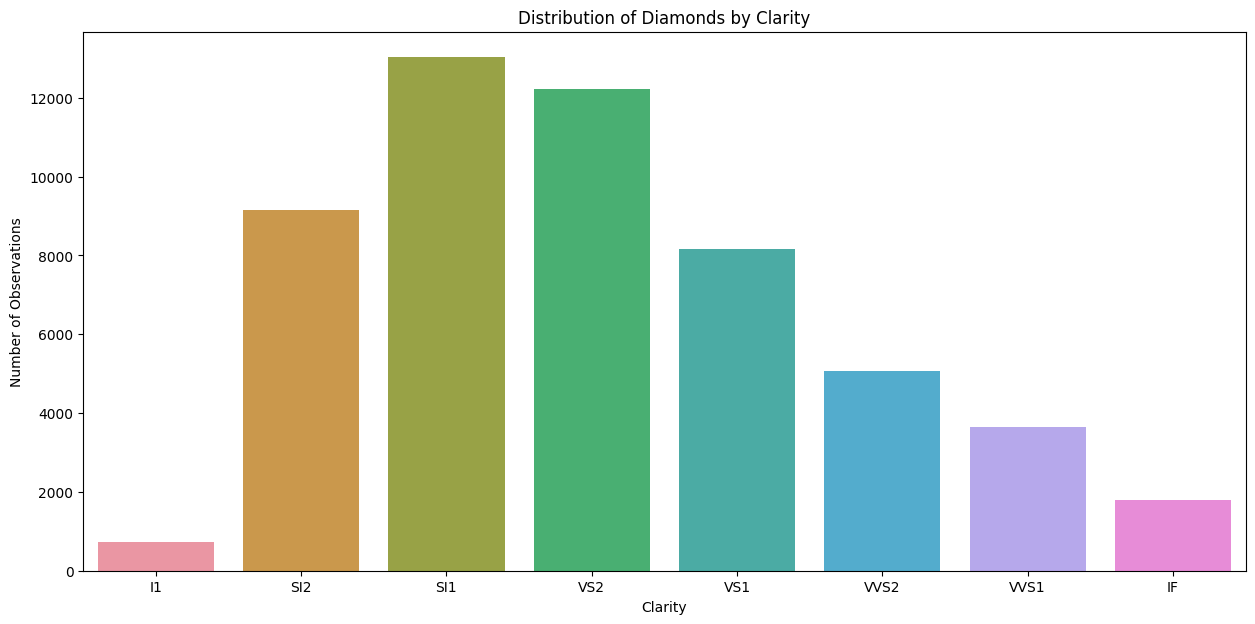

In [21]:
plt.figure(figsize=(15, 7))
sns.countplot(x="clarity", data=df_diamonds, order=["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"])
plt.title("Distribution of Diamonds by Clarity")
plt.xlabel("Clarity")
plt.ylabel("Number of Observations")
plt.show()

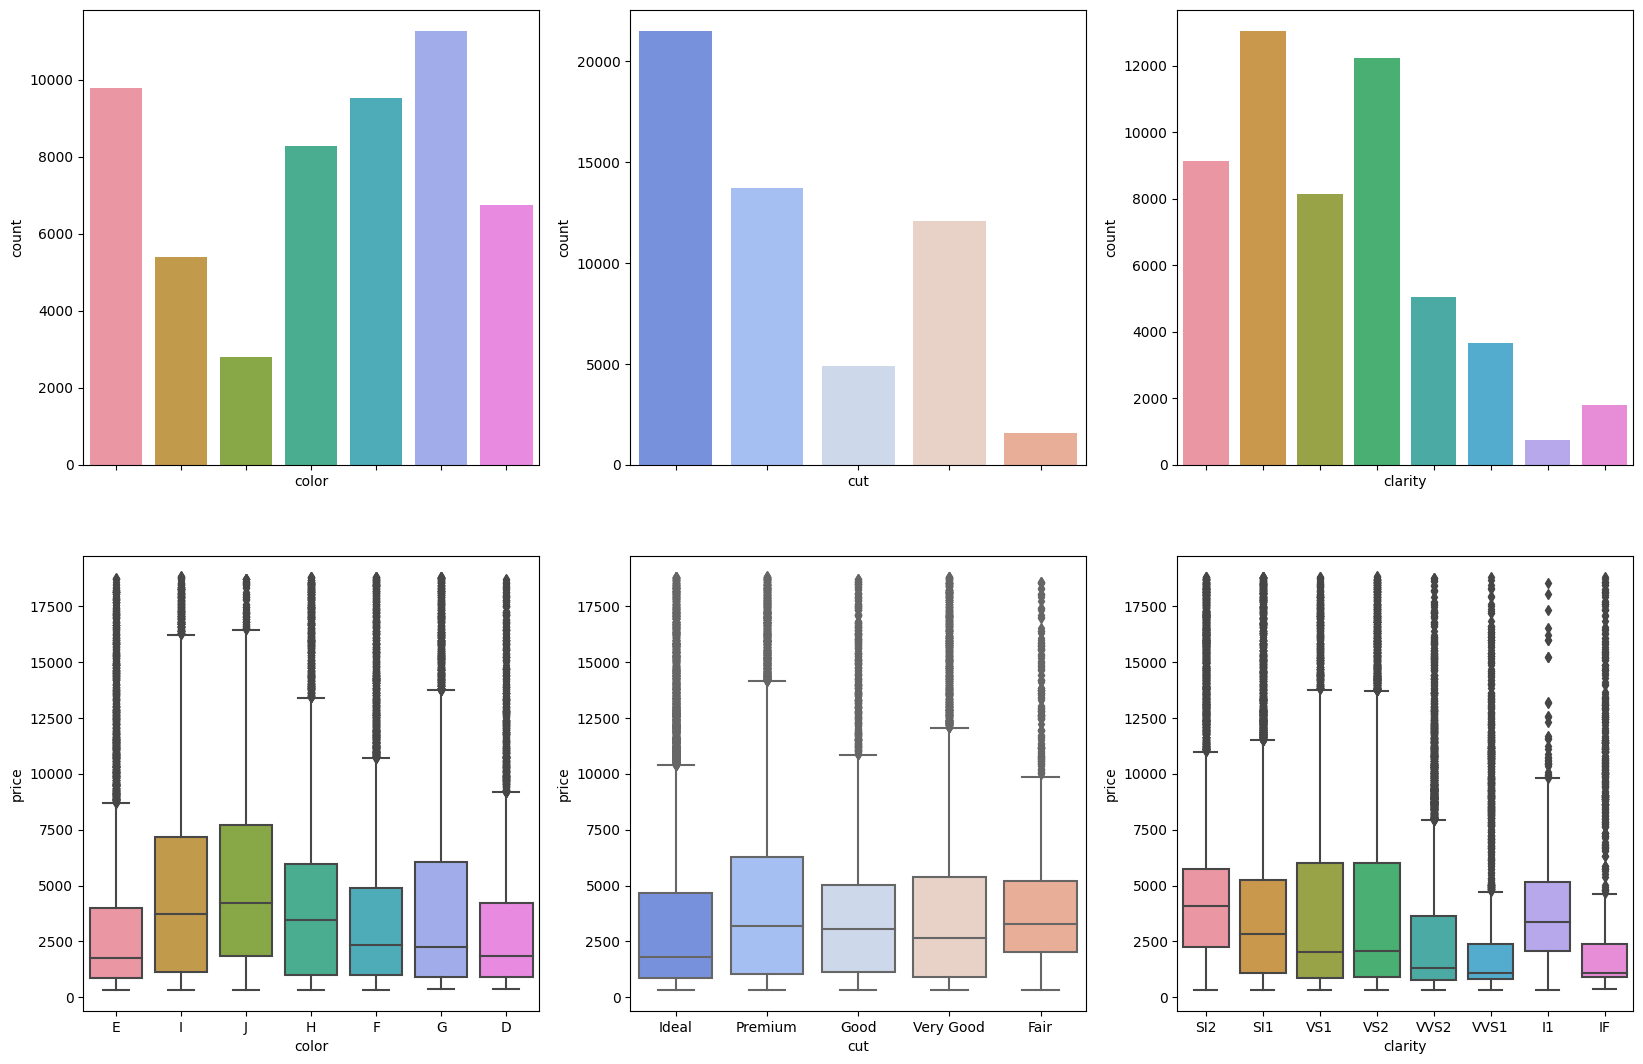

In [22]:
cats = ['color', 'cut', 'clarity']
c = 0

fig, axs = plt.subplots(ncols=len(cats), nrows=2, sharex='col', figsize=(20, 13))

for i in cats:
    sns.countplot(data=df_diamonds, x=df_diamonds[i], ax=axs[0, c])
    sns.boxplot(data=df_diamonds, x=df_diamonds[i], y=df_diamonds['price'], ax=axs[1, c])
    c += 1

**Identifying Relavent Features**

Converting Categorial values:

Colors:
E = 0, I = 1, J = 2, H = 3, F = 4, G = 5, D = 6

Cuts:
Ideal = 0, Premium = 1, Good = 2, Very Good = 3, Fair = 4

Clarity:
SI2= 0, SI1 = 1, VS1 = 2, VS2 = 3, VVS2 = 4, VVS1 = 5, I1 = 6, IF = 7

So, now we have a dataframe with only numeric values.

In [23]:
diamonds = df_diamonds.copy()
#Converting Categorial to numeric values

cats = ['color', 'cut', 'clarity']

for i in cats:
    diamonds[i+'_numeric'] = pd.factorize(diamonds[i])[0]
    diamonds.drop(i, axis = 1, inplace = True)

In [24]:
diamonds = diamonds.rename(columns = {'color_numeric': 'color', 'cut_numeric': 'cut', 'clarity_numeric': 'clarity'})
diamonds.head(10)

,carat,depth,table,price,x,y,z,color,cut,clarity
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,1,1
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,2,2
3,0.29,62.4,58.0,334,4.20,4.23,2.63,1,1,3
4,0.31,63.3,58.0,335,4.34,4.35,2.75,2,2,0
5,0.24,62.8,57.0,336,3.94,3.96,2.48,2,3,4
6,0.24,62.3,57.0,336,3.95,3.98,2.47,1,3,5
7,0.26,61.9,55.0,337,4.07,4.11,2.53,3,3,1
8,0.22,65.1,61.0,337,3.87,3.78,2.49,0,4,3
9,0.23,59.4,61.0,338,4.00,4.05,2.39,3,3,2


In [25]:
correlation_matrix=diamonds.corr()

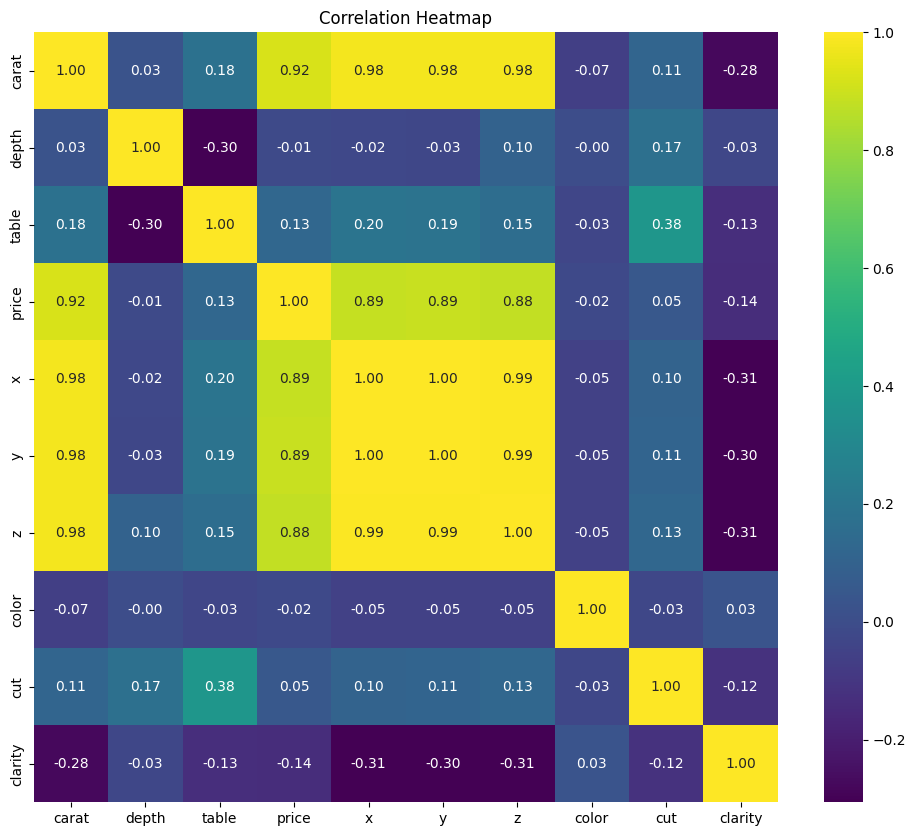

In [26]:
# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [27]:
# Compute the correlation matrix
correlation_matrix = diamonds.corr()

# Extract the correlation of features with the target variable
target_correlation = correlation_matrix['price'].drop('price')  # Drop the target variable itself

# Sort the correlations in descending order
target_correlation_sorted = target_correlation.abs().sort_values(ascending=False)

# Display the sorted correlations
print("Correlation of features with the target variable (price):\n", target_correlation_sorted)

Correlation of features with the target variable (price):
 carat      0.921546
y          0.888708
x          0.887118
z          0.882504
clarity    0.139456
table      0.126425
cut        0.048560
color      0.016298
depth      0.010766
Name: price, dtype: float64


**Strong Positive Correlation:**
- Features like carat, y, x, and z have strong positive correlations with the target variable price. This indicates that as the values of these features increase, the price of the diamond tends to increase as well. Among these, carat has the highest correlation coefficient, suggesting it is the most strongly correlated feature with the price.

**Weak Positive Correlation:**
- Features such as clarity, table, cut, and color have weaker positive correlations with the target variable. While these correlations are positive, they are relatively weaker compared to carat, y, x, and z.

**Weak Correlation:**
- Features like depth have very weak positive correlations with the target variable. The correlation coefficient is close to zero, indicating little to no linear relationship between depth and price

**Therefore, the relevant features for building a predictive model for diamond prices based on correlation analysis are:**
- **Carat**
- **Dimensions (Y, X, Z)**

### Phase 3: Model Implementation and Baseline Evaluation

In [28]:
# dividing data into homogeneous subgroups via stratified sampling
diamonds['x_sample'] = pd.cut(diamonds['x'],bins = [3, 4, 5, 6, 7, 8, 9, np.inf],
                           labels = [1, 2, 3, 4, 5, 6, 7])
diamonds['x_sample'].value_counts()

x_sample
2    17059
4    14996
3    14035
5     5331
6     1813
1      488
7       41
Name: count, dtype: int64

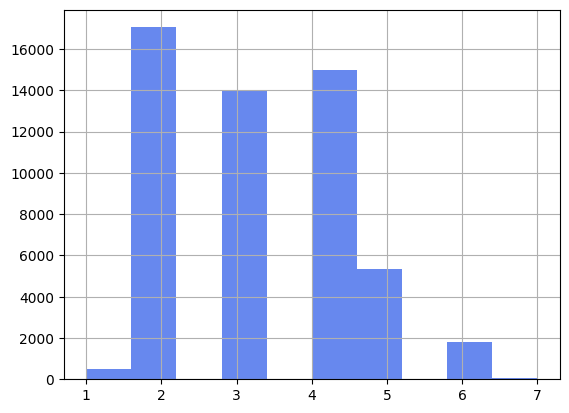

In [29]:
# viewing examples in each strata
diamonds['x_sample'].hist();

In [30]:
# performing stratified sampling
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(diamonds, diamonds['x_sample']):
    strat_train_set = diamonds.iloc[train_index]
    strat_test_set = diamonds.iloc[test_index]

In [31]:
# removing stratified variable attribute
for set in(strat_train_set, strat_test_set):
    set.drop('x_sample', axis = 1, inplace = True)

In [32]:
# dividing the data into training and testing set
X_train_current = strat_train_set.drop(['price', 'carat'], axis=1)
y_train = strat_train_set[['price','carat']]

X_test_current = strat_test_set.drop(['price', 'carat'], axis=1)
y_test = strat_test_set[['price','carat']]

In [33]:
# feature scaling using Standard Scaler
sc = StandardScaler()
X_train_norm = sc.fit_transform(X_train_current)
X_test_norm = sc.transform(X_test_current)
X_train = pd.DataFrame(data=X_train_norm, index=X_train_current.index, columns=X_train_current.columns)
X_test = pd.DataFrame(data=X_test_norm, index=X_test_current.index, columns=X_test_current.columns)

#### Define the regression models

In [35]:
regression_models = ['Linear Regression', 'K Nearest Neighbour', 'DecisionTree Regression', 'RandomForest Regression']

# Initialize regressor objects
regressors = []

regressors.append(LinearRegression())
regressors.append(KNeighborsRegressor())  # Corrected
regressors.append(DecisionTreeRegressor())
regressors.append(RandomForestRegressor())

In [36]:
# creating lists to keep track of the training and the testing R2 Scores
train_r2_scores = []
test_r2_scores = []

# training and testing all the regression models
for regressor in regressors:
    regression_pipeline = Pipeline(steps = [
              ('regressor',regressor)
           ])
    
    print(f'************START OF THE {regressor} MODEL************\n')
    
    print(f'Training the {regressor} model')
    start_time = time.time()
    model = regression_pipeline.fit(X_train, y_train)
    end_time = time.time()
    print(f'Time taken to fit the {regressor} model: {round(end_time - start_time, 2)} seconds')
    
    train_predictions = model.predict(X_train)
    train_rmse = mean_squared_error(y_train, train_predictions)**0.5
    train_r2 = r2_score(y_train, train_predictions)
    train_r2_scores.append(train_r2)
    print('\nTraining Details:')
    print(f'{regressor} model RMSE: {train_rmse}')
    print(f'{regressor} model R2 score: {train_r2}')
    
    print(f'\nTesting the {regressor} model')

    test_predictions = model.predict(X_test)
    test_rmse = mean_squared_error(y_test, test_predictions)**0.5
    test_r2 = r2_score(y_test, test_predictions)
    test_r2_scores.append(test_r2)
    print('\nTesting Details:')
    print(f'{regressor} model RMSE: {test_rmse}')
    print(f'{regressor} model R2 score: {test_r2}')

    print(f'\n************END OF THE {regressor} MODEL************\n\n')

************START OF THE LinearRegression() MODEL************

Training the LinearRegression() model
Time taken to fit the LinearRegression() model: 0.01 seconds

Training Details:
LinearRegression() model RMSE: 1224.8326045649226
LinearRegression() model R2 score: 0.8860633147846844

Testing the LinearRegression() model

Testing Details:
LinearRegression() model RMSE: 1220.512213245777
LinearRegression() model R2 score: 0.8846032648251505

************END OF THE LinearRegression() MODEL************


************START OF THE KNeighborsRegressor() MODEL************

Training the KNeighborsRegressor() model
Time taken to fit the KNeighborsRegressor() model: 0.01 seconds

Training Details:
KNeighborsRegressor() model RMSE: 486.6662548425258
KNeighborsRegressor() model R2 score: 0.9825601099473242

Testing the KNeighborsRegressor() model

Testing Details:
KNeighborsRegressor() model RMSE: 603.489133020974
KNeighborsRegressor() model R2 score: 0.972538262641242

************END OF THE KNei

In [37]:
import pandas as pd

# Create DataFrame to compare R2 scores
model_r2_compare = pd.DataFrame({'Algorithm': regression_models,
                                 'Training_R2_Score': train_r2_scores,
                                 'Testing_R2_Score': test_r2_scores})

# Filter the DataFrame for specified regression models
specified_models = ['Linear Regression', 'K Nearest Neighbour', 'DecisionTree Regression', 'RandomForest Regression']
specified_model_r2_compare = model_r2_compare[model_r2_compare['Algorithm'].isin(specified_models)]

# Sort the DataFrame by testing R2 scores in descending order
specified_model_r2_compare_sorted = specified_model_r2_compare.sort_values(by='Testing_R2_Score', ascending=False)

# Print the DataFrame
specified_model_r2_compare_sorted

,Algorithm,Training_R2_Score,Testing_R2_Score
3,RandomForest Regression,0.998411,0.988624
2,DecisionTree Regression,0.999995,0.978346
1,K Nearest Neighbour,0.982560,0.972538
0,Linear Regression,0.886063,0.884603


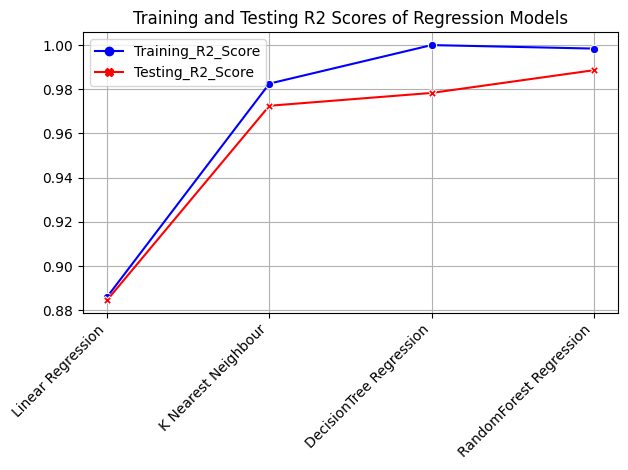

In [38]:
# Define a custom color palette
custom_palette = ['blue', 'red']  # Example colors

# Create a line plot for training and testing R2 scores with custom colors
ax = sns.lineplot(data=model_r2_compare[['Training_R2_Score', 'Testing_R2_Score']], dashes=False, markers=True, palette=custom_palette)

# Set x-axis ticks and labels
ax.set_xticks(range(len(model_r2_compare['Algorithm'])))
ax.set_xticklabels(model_r2_compare['Algorithm'], rotation=45, ha='right')

plt.title('Training and Testing R2 Scores of Regression Models')
plt.grid()==True

plt.tight_layout()
plt.show()

**Based on R2 scores alone, the Random Forest Regression model appears to be the best performer among the models considered.**

### Phase 4: Hyperparameter Tuning

Hyperparameter Tuning Following are the most important settings for a RandomForest Regressor:

- n_estimators: number of trees in the forest
- max_features: maximum number of features considered for splitting a node.

The above hyperparameters are tuned along with another hyperparameter named bootstrap that tells if the data points are sampled with or without replacement.

**Random Search with Cross Validation**

In [39]:
# storing the testing data R2 Score of the base RandomForest Regressor model
rf_base_r2 = max(model_r2_compare.sort_values(by='Testing_R2_Score', ascending=False)['Testing_R2_Score'])

In [40]:
# initializing a list to store improvement in R2 Score using Random Search with Cross Validation
improved_test_r2_scores = [rf_base_r2]

# initializing a list to track the run time of the improvement models that follow
run_time = []

In [41]:
# creating the parameter grid for random search
param_distributions_one = {
    'bootstrap': [False, True],
    'n_estimators': [75, 100, 125, 150],
    'max_features': [2, 4, 6, 8, 10]
}

In [42]:
# Initialize Random Forest Regressor
forest_reg = RandomForestRegressor()

# Initialize RandomizedSearchCV
random_search_one = RandomizedSearchCV(forest_reg, param_distributions_one, cv=5, scoring='r2', return_train_score=True)

# Fit RandomizedSearchCV to the training data
random_search_one.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [False, True],
                                        'max_features': [2, 4, 6, 8, 10],
                                        'n_estimators': [75, 100, 125, 150]},
                   return_train_score=True, scoring='r2')

In [43]:
# Extracting the best parameters from the first random search
best_params_random_search_one = random_search_one.best_params_
best_params_random_search_one

{'n_estimators': 150, 'max_features': 10, 'bootstrap': True}

In [44]:
# Initializing a RandomForest Regressor with the best parameters
random_forest_regressor_random_search = RandomForestRegressor(bootstrap=best_params_random_search_one['bootstrap'],
                                                max_features=best_params_random_search_one['max_features'],
                                                n_estimators=best_params_random_search_one['n_estimators'])

# Training and testing the model along with tracking the run time
print(f'Training the {random_forest_regressor_random_search} model')

start_time = time.time()
model_random_search_one = random_forest_regressor_random_search.fit(X_train, y_train)

print(f'\nTesting the {random_forest_regressor_random_search} model')

random_search_one_test_predictions = model_random_search_one.predict(X_test)
end_time = time.time()
current_run_time = round(end_time - start_time, 2)
print(f'Time taken to fit and test the {random_forest_regressor_random_search} model: {current_run_time} seconds')
run_time.append(current_run_time)

random_search_one_rmse = mean_squared_error(y_test, random_search_one_test_predictions)**0.5
random_search_one_r2 = r2_score(y_test, random_search_one_test_predictions)
improved_test_r2_scores.append(random_search_one_r2)
print('\nTesting Details:')
print(f'{random_forest_regressor_random_search} model RMSE: {random_search_one_rmse}')
print(f'{random_forest_regressor_random_search} model R2 score: {random_search_one_r2}')

Training the RandomForestRegressor(max_features=10, n_estimators=150) model

Testing the RandomForestRegressor(max_features=10, n_estimators=150) model
Time taken to fit and test the RandomForestRegressor(max_features=10, n_estimators=150) model: 14.29 seconds

Testing Details:
RandomForestRegressor(max_features=10, n_estimators=150) model RMSE: 401.5806415794716
RandomForestRegressor(max_features=10, n_estimators=150) model R2 score: 0.9887416027263363


**RMSE (Root Mean Squared Error): 0.0313**
- The RMSE represents the average deviation of the predicted values from the actual values. In this case, the average deviation is approximately 0.0313, which suggests that the model's predictions are typically within this range of the actual target values.

**R2 Score: 0.9789**
- The R2 score, also known as the coefficient of determination, measures the proportion of the variance in the dependent variable that is predictable from the independent variables. A score of 0.9789 indicates that the model explains approximately 97.89% of the variance in the target variable, which is quite high.

These numerical values provide insights into the performance of the RandomForestRegressor model on the testing dataset. The low RMSE and high R2 score suggest that the model performs well in making accurate predictions and explaining the variance in the target variable.

In [45]:
# Viewing the improvement in the R2 Score over the base R2 Score
print(f'Improvement of {((random_search_one_r2 - rf_base_r2) / rf_base_r2)}')

Improvement of 0.00011886450261482281


In [46]:
# Print R2 scores for base and improved random_search_one model
print(f'Base RandomForest Regression R2 Score: {rf_base_r2}')
print(f'Improved RandomForest Regression R2 Score: {random_search_one_r2}')

Base RandomForest Regression R2 Score: 0.988624090415556
Improved RandomForest Regression R2 Score: 0.9887416027263363


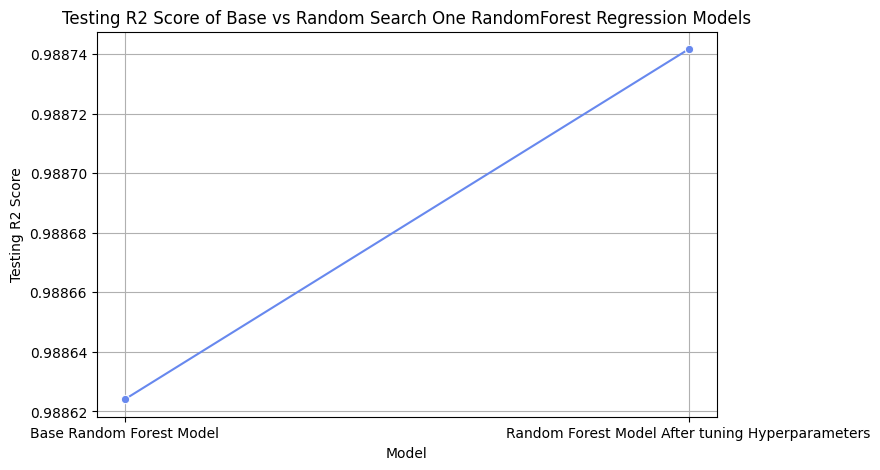

In [53]:
# List of model names
model_names = ['Base Random Forest Model', 'Random Forest Model After tuning Hyperparameters']  # Add more model names if needed

# R2 scores for each model
r2_scores = [rf_base_r2, random_search_one_r2]  # Add R2 scores for other models

# Plotting the R2 scores as a line plot
plt.figure(figsize=(8, 5))
sns.lineplot(x=model_names, y=r2_scores, marker='o')
plt.xlabel('Model')
plt.ylabel('Testing R2 Score')
plt.title('Testing R2 Score of Base vs Random Search One RandomForest Regression Models')
plt.grid(True)
plt.xticks(rotation=0)
plt.show()

Base RandomForest Regression R2 Score: 0.9886

Improved RandomForest Regression R2 Score: 0.9887

- The difference in R2 scores between the base and improved models is only 0.0001. While this difference may seem negligible, it signifies a marginal enhancement in the improved model's ability to explain the variance in the target variable compared to the base model. This improvement could be attributed to the hyperparameter tuning process, which fine-tuned the model's parameters to better capture patterns in the data.

- In summary, although the difference in R2 scores is small, it indicates that the improved model has a slightly better fit to the data compared to the base model, highlighting the effectiveness of hyperparameter tuning in optimizing model performance.

### Phase 5: Model Evaluation and Comparative Analysis

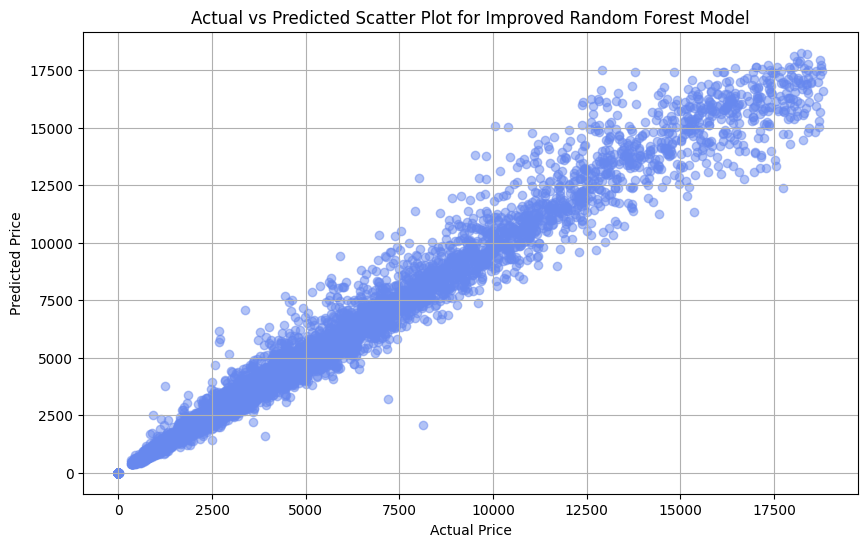

In [73]:
# Predictions
improved_rf_test_predictions = model_random_search_one.predict(X_test)

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, improved_rf_test_predictions, alpha=0.5)
plt.title('Actual vs Predicted Scatter Plot for Improved Random Forest Model')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()

In [66]:
for regressor, model in zip(regression_models, regressors):
    # Predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Compute metrics for training data
    train_mae = mean_absolute_error(y_train, train_predictions)
    train_mse = mean_squared_error(y_train, train_predictions)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train, train_predictions)

    # Compute metrics for testing data
    test_mae = mean_absolute_error(y_test, test_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, test_predictions)

    # Print metrics
    print(f"{regressor} Training Metrics:")
    print("Training Metrics:")
    print(f"Training MAE: {train_mae}")
    print(f"Training MSE: {train_mse}")
    print(f"Training RMSE: {train_rmse}")
    print(f"Training R2 Score: {train_r2}")

    print(f"\n{regressor} Testing Metrics:")
    print(f"Testing MAE: {test_mae}")
    print(f"Testing MSE: {test_mse}")
    print(f"Testing RMSE: {test_rmse}")
    print(f"Testing R2 Score: {test_r2}\n")

Linear Regression Training Metrics:
Training Metrics:
Training MAE: 639.2552524937246
Training MSE: 1500214.9092052921
Training RMSE: 1224.8326045649226
Training R2 Score: 0.8860633147846844

Linear Regression Testing Metrics:
Testing MAE: 638.8564592418211
Testing MSE: 1489650.062682105
Testing RMSE: 1220.512213245777
Testing R2 Score: 0.8846032648251505

K Nearest Neighbour Training Metrics:
Training Metrics:
Training MAE: 174.33403489885964
Training MSE: 236844.04360245026
Training RMSE: 486.6662548425258
Training R2 Score: 0.9825601099473242

K Nearest Neighbour Testing Metrics:
Testing MAE: 216.94962410489973
Testing MSE: 364199.1336744068
Testing RMSE: 603.489133020974
Testing R2 Score: 0.972538262641242

DecisionTree Regression Training Metrics:
Training Metrics:
Training MAE: 0.34962159962799344
Training MSE: 75.11271800337131
Training RMSE: 8.666759371493553
Training R2 Score: 0.9999951488891157

DecisionTree Regression Testing Metrics:
Testing MAE: 191.40423300474285
Testing 

In [68]:
# Predictions
random_search_one_test_predictions = model_random_search_one.predict(X_test)

# Compute metrics
random_search_one_rmse = mean_squared_error(y_test, random_search_one_test_predictions) ** 0.5
random_search_one_mae = mean_absolute_error(y_test, random_search_one_test_predictions)
random_search_one_mse = mean_squared_error(y_test, random_search_one_test_predictions)
random_search_one_r2 = r2_score(y_test, random_search_one_test_predictions)

# Print metrics
print("Improved Random Forest Model Metrics:")
print("Testing Metrics:")
print(f"Testing RMSE: {random_search_one_rmse}")
print(f"Testing MAE: {random_search_one_mae}")
print(f"Testing MSE: {random_search_one_mse}")
print(f"Testing R2 Score: {random_search_one_r2}")

Improved Random Forest Model Metrics:
Testing Metrics:
Testing RMSE: 401.5806415794716
Testing MAE: 144.16242180595282
Testing MSE: 161267.01169138003
Testing R2 Score: 0.9887416027263363


### Phase 6: Conclusion

**Based on the above metrics:**

**Linear Regression:**
   - Both training and testing metrics (MAE, MSE, RMSE, R2 Score) indicate good performance.
   - The model has decent predictive capability, with RMSE around 1220 and R2 Score around 0.885 on the testing data.


**K Nearest Neighbors (KNN):**
   - KNN shows excellent performance on the training data, with very low MAE, MSE, and RMSE.
   - However, there is a slight increase in error metrics on the testing data, indicating some level of overfitting.
   - Despite this, the model still performs well on the testing data, with RMSE around 603 and R2 Score around 0.973.


**Decision Tree Regression:**
   - Decision Tree achieves near-perfect performance on the training data, with very low error metrics.
   - However, there is a noticeable increase in error metrics on the testing data, indicating overfitting.
   - Despite this overfitting, the model performs well on the testing data, with RMSE around 556 and R2 Score around 0.978.
   

**Random Forest Regression:**
   - Random Forest also shows very low error metrics on the training data, indicating good performance.
   - The model generalizes well to the testing data with relatively low error metrics (RMSE around 403 and R2 Score around 0.989).
   
   
**Improved Random Forest Model:**
   - **The improved Random Forest model shows even better performance on the testing data compared to the regular Random Forest model, with slightly lower RMSE and slightly higher R2 Score.**
   - **This indicates that hyperparameter tuning or other optimization techniques have led to a better-performing model.****

Overall, all models perform well on the testing data, but the *improved Random Forest model after hyperparameter tuning* appears to be the best-performing model for predicting diamond prices